<a href="https://colab.research.google.com/github/SantiagoRidao/Proyectos_Data/blob/main/TP%20Registro%20de%20temperaturas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***TRABAJO PRACTICO Nro 2- REDES NEURONALES***




#**Comision 3 Grupo Super D**
**Referente o Reperesentante Del Grupo: Ivan Zagar**


#**Listado de Intengrante del Grupo Super D**



Ridao  Santiago
*    DNI:31253267
*    Tel:2235778250
*    ridaosantiago@gmail.com




Se les proporcionará una base de datos de ciudades de Argentina y los registros de Máxima y Mínima temperatura a lo largo de un año.Dicha base de datos fue obtenida del registro nacional de las siguientes enlaces: [detalle de la base de datos](https://datos.gob.ar/dataset/smn-registro-temperatura-365-dias/archivo/smn_5.1) - [REGISTRO DE TEMPERATURA 365 DIAS](https://www.smn.gob.ar/descarga-de-datos).

La base de datos también podra ser descargada del sigueinte enlace del drive [BASE DE DATOS](https://drive.google.com/drive/folders/18rTLeY5A8DOwz39TB563HPHIpZTJM3CA?usp=sharing)

Se deberá ralizar los siguientes pasos.


1.   Seleccionar una ciudad y reconstruir una nueva base de datos tomando la temperatura promedio entre la max y min de cada dia, para dicha ciudad. Graficar dichos datos TIEMPO VS TEMPERATURA Y SELECCIONAR UN PERIODO DE TIEMPO DONDE LA GRAFICA SEA CRECIENTE. Esto servira para construir una nueva base de datos.


2.  Agregar a la nueva base de datos creada del insciso anterior una columna con las siguientes variables , generadas a través de simulación aleatoria:


   * VARIABLE: PRECIO DEL KILO DE HELADO- construir esta variable usando simulación aleatoria de regresión lineal en función de la temperatura. De manera que a mayor temperatura el precio sea MAYOR,  a menor temperatura el precio será menor. Definir el  rango del precio del helado y la tasa o porcentaje de incremento del precio
  
   * COMPRA HELADO: VARIABLE CATEGORICA , RESPUESTA SI/NO. Generar esta variable con simulación aleatoria de manera que si el precio del helado es mas del 40 % del precio inicial, la persona decide NO COMPRAR EL HELADO, ESTO SUCEDE CON UNA PROPORCION O PROBABILIDAD DEL 80% DE LA CANTIDAD TOTAL DE REGISTROS.

3. GENERAR TRES  PERCEPTRONES (SEGUIR LOS EJEMPLOS MOSTRADOS DE PERCEPTRON EN CLASE)CONECTADOS ENTRE SI DE MANERA QUE TENGA COMO CONDICIÓN LO SIGUIENTE:

  * SI HACEN MÁS DE 27 GRADOS DE TEMPERATURA O INCLUSIVE SI EL PRECIO DEL HELADO ESTA POR DEBAJO DEL 40 % DE INCREMENTO, LA RED NEURONAL DEBERA INDICAR QUE SE COMPRA EL HELADO. ( los pesos colocarlos de manera aleatoria, usar la función de salto finito o función sigmoide para la activación)

4. Luego de diseñar los perceptrones, implementarlos sobre la base de datos generada de manera que se les pase por argumento las variables: TEMPERATURA PROMEDIO, PRECIO DEL HELADO. Comparar la proporción de respuestas correctas en las que coincide el resultado de la red neuronal , con la variable COMPRA HELADOS . Esto último es una forma de medir la exactitud de la red.

----------------------------------------------------
----------------------------------------------------

DATOS BASADOS EN INFORMACIÓN PÚBLICA DE CIUDADES ARGENTINAS Y LOS REGISTROS DE MAXIMA Y MINIMA TEMPERATURA A LO LARGO DEL AÑO.

**El dataset podran ser descargado del siguiente enlace de drive.**
*  CSV
https://drive.google.com/file/d/19mkGjq0kXPwXnSj4suHq5YA-ERmLh7iZ/view?usp=drive_link

*  TXT
https://drive.google.com/file/d/1T5ix4XrTbjG1SoJrNlYGnrjFIXqLVceA/view?usp=sharing

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**1.**   **Seleccionar una ciudad y reconstruir una nueva base de datos tomando la temperatura promedio entre la max y min de cada dia, para dicha ciudad. Graficar dichos datos TIEMPO VS TEMPERATURA Y SELECCIONAR UN PERIODO DE TIEMPO DONDE LA GRAFICA SEA CRECIENTE. Esto servira para construir una nueva base de datos**.

In [ ]:
#Carga del dataset:
file_id = '1m5cytTl5PwiORfJEo_1Ihk5lhGScDehU'
url = f'https://drive.google.com/uc?id={file_id}'
#file_name = 'registro_temperatura365d_smn.txt'

# Definir el ancho de cada columna según el formato fijo
widths = [8, 6, 6, 20]

# Definir los nombres de las columnas
names = ['FECHA', 'TMAX', 'TMIN', 'NOMBRE']
datos = pd.read_fwf(url , names= names, header= None, encoding= 'Latin-1')

# Mostrar las primeras filas de los datos
datos.head()

,FECHA,TMAX,TMIN,NOMBRE
0,FECHA,TMAX,TMIN,NOMBRE
1,--------,-----,-----,----------------------------------------
2,30102023,21.3,10.5,AEROPARQUE AERO
3,30102023,18.4,8.6,AZUL AERO
4,30102023,18.8,4.5,BAHIA BLANCA AERO


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43678 entries, 0 to 43677
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   FECHA   43678 non-null  object
 1   TMAX    41309 non-null  object
 2   TMIN    42118 non-null  object
 3   NOMBRE  43678 non-null  object
dtypes: object(4)
memory usage: 1.3+ MB


In [ ]:
datos.describe()

,FECHA,TMAX,TMIN,NOMBRE
count,43678,41309,42118,43678
unique,367,658,567,123
top,02052023,27.0,8.0,MERCEDES AERO (CTES)
freq,121,396,411,365


In [ ]:
#Limpieza del dataset:
#Eliminamos las filas o y 1 por no tener información relevante
dtemp = datos
dtemp = dtemp.drop(0)
dtemp = dtemp.drop(1)
dtemp.head()

,FECHA,TMAX,TMIN,NOMBRE
2,30102023,21.3,10.5,AEROPARQUE AERO
3,30102023,18.4,8.6,AZUL AERO
4,30102023,18.8,4.5,BAHIA BLANCA AERO
5,30102023,7.5,-0.4,BARILOCHE AERO
6,30102023,-5.5,-18.7,BASE BELGRANO II


In [ ]:
#Eliminamos filas con valores faltantes
dtemp = dtemp.dropna()
dtemp.head(10)

,FECHA,TMAX,TMIN,NOMBRE
2,30102023,21.3,10.5,AEROPARQUE AERO
3,30102023,18.4,8.6,AZUL AERO
4,30102023,18.8,4.5,BAHIA BLANCA AERO
5,30102023,7.5,-0.4,BARILOCHE AERO
6,30102023,-5.5,-18.7,BASE BELGRANO II
7,30102023,1.0,-6.4,BASE CARLINI (EX JUBANY)
8,30102023,4.9,-12.6,BASE ESPERANZA
9,30102023,5.3,-14.7,BASE MARAMBIO
10,30102023,-6.1,-12.8,BASE ORCADAS
11,30102023,2.5,-5.8,BASE SAN MARTIN


In [ ]:
dtemp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40030 entries, 2 to 43677
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   FECHA   40030 non-null  object
 1   TMAX    40030 non-null  object
 2   TMIN    40030 non-null  object
 3   NOMBRE  40030 non-null  object
dtypes: object(4)
memory usage: 1.5+ MB


In [ ]:
from datetime import datetime
# Agrego una columna con las fechas en formato date
dtemp['FECHA_T'] = pd.to_datetime(dtemp['FECHA'], format='%d%m%Y', errors='coerce')

# Agrego una columna con las temperaturas máximas en formato float
dtemp['TMAX_F'] = pd.to_numeric(dtemp['TMAX'], errors='coerce', downcast='float')

# Agrego una columna con las temperaturas mínimas en formato float
dtemp['TMIN_F'] = pd.to_numeric(dtemp['TMIN'], errors='coerce', downcast='float')

In [ ]:
dtemp['Tprom'] = (dtemp['TMAX_F'] + dtemp['TMIN_F']) / 2

In [ ]:
dtemp = dtemp.drop(['FECHA', 'TMAX', 'TMIN'], axis=1)

In [ ]:
#ciudades_ = dtemp[dtemp['NOMBRE'].str.startswith('')] #BUSCAR CIUDAD POR NOMBRE SI NO SE SABE LA DENOMINACION EN EL DF
#ciudades_.head(10)

In [ ]:
dtemp.head()

,NOMBRE,FECHA_T,TMAX_F,TMIN_F,Tprom
2,AEROPARQUE AERO,2023-10-30,21.299999,10.500000,15.90
3,AZUL AERO,2023-10-30,18.400000,8.600000,13.50
4,BAHIA BLANCA AERO,2023-10-30,18.799999,4.500000,11.65
5,BARILOCHE AERO,2023-10-30,7.500000,-0.400000,3.55
6,BASE BELGRANO II,2023-10-30,-5.500000,-18.700001,-12.10


In [ ]:
dtemp.info(35)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40030 entries, 2 to 43677
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   NOMBRE   40030 non-null  object        
 1   FECHA_T  40030 non-null  datetime64[ns]
 2   TMAX_F   40030 non-null  float32       
 3   TMIN_F   40030 non-null  float32       
 4   Tprom    40030 non-null  float32       
dtypes: datetime64[ns](1), float32(3), object(1)
memory usage: 1.4+ MB


In [ ]:
ciudades_altas_temperaturas = dtemp[dtemp['Tprom'] > 27] # VEMOS QUE CIUDAD TIENE UNA TEMPERATURA PROMEDIO MAYOR A 27 (POR CONSIGNA)
ciudades_altas_temperaturas.head(20)

,NOMBRE,FECHA_T,TMAX_F,TMIN_F,Tprom
52,LAS LOMITAS,2023-10-30,37.000000,23.000000,30.000000
68,ORAN AERO,2023-10-30,35.200001,21.400000,28.299999
87,RIVADAVIA,2023-10-30,37.000000,21.799999,29.400000
135,CATAMARCA AERO,2023-10-29,41.000000,16.400000,28.700001
136,CERES AERO,2023-10-29,37.799999,20.000000,28.900000
137,CHAMICAL AERO,2023-10-29,40.299999,22.000000,31.150000
139,CHEPES,2023-10-29,38.000000,16.500000,27.250000
144,CORDOBA AERO,2023-10-29,38.000000,20.299999,29.150000
145,CORDOBA OBSERVATORIO,2023-10-29,38.799999,21.299999,30.049999
162,JUJUY AERO,2023-10-29,39.500000,18.400000,28.950001


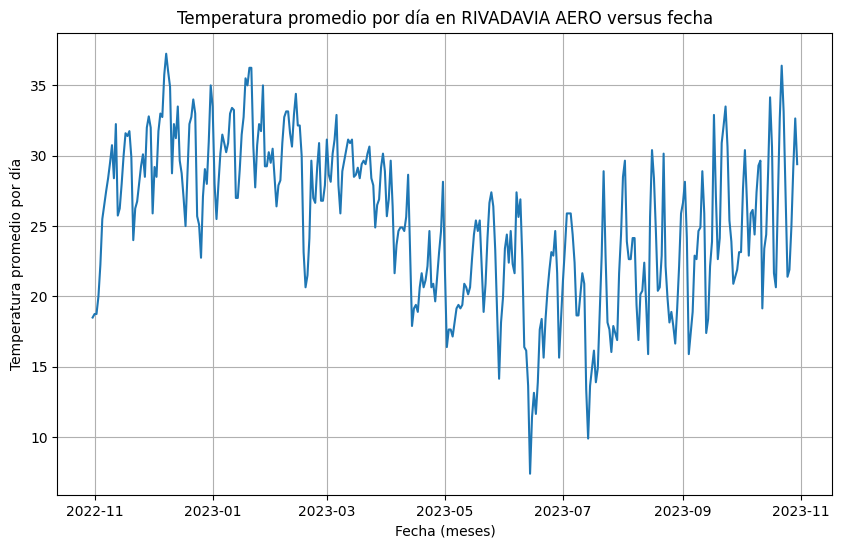

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar los datos para obtener solo la estación 'RIVADAVIA'
d_ciudad = dtemp[dtemp['NOMBRE'] == 'RIVADAVIA']

# Calcular la temperatura promedio diaria
#d_SAO['Tprom'] = d_SAO[['TMAX_F', 'TMIN_F']].mean(axis=1) # Esta calculado arriba

# Crear el gráfico
plt.figure(figsize=(10,6))
sns.lineplot(data=d_ciudad, x='FECHA_T', y='Tprom')
plt.xlabel('Fecha (meses)')
plt.ylabel('Temperatura promedio por día')
plt.title('Temperatura promedio por día en RIVADAVIA AERO versus fecha')
plt.grid(True)
plt.show()

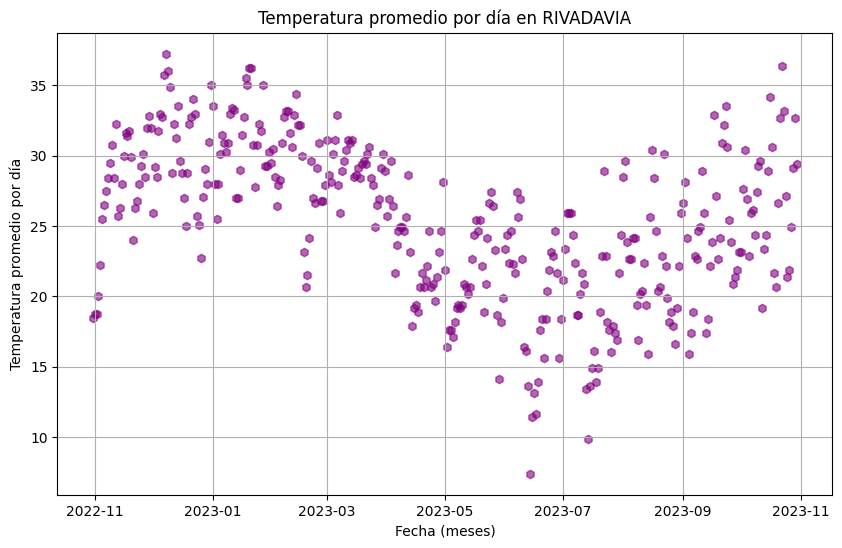

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.scatter(d_ciudad['FECHA_T'], d_ciudad['Tprom'], marker='h', color='purple', linestyle='-', alpha = 0.6)
plt.xlabel('Fecha (meses)')
plt.ylabel('Temperatura promedio por día')
plt.title('Temperatura promedio por día en RIVADAVIA')
plt.grid(True)
plt.show()

 Podemos ver que en los datos de RIVADAVIA se muestra un crecimiento en la temperatura entre el mes de Noviembre 2022 hacia febrero del año 2023 (2022-11 a 2023-02). Esto es el periodo de primavera - hacia el Verano. Este es un periodo de crecimiento en los datos que se puede seleccionar para trabajar en el paso dos. Se puede hacer el mismo procedimiento más o menos de forma similar dependiendo de la ciudad que se haya elegido.

In [ ]:
d_ciudad['FECHA_T'] = pd.to_datetime(d_ciudad['FECHA_T'])

# Filtra los datos para obtener solo los meses de septiembre a noviembre
df_sept_nov = d_ciudad[(d_ciudad['FECHA_T'].dt.month >= 9) & (d_ciudad['FECHA_T'].dt.month < 11)]
df_sept_nov.head(10)

<ipython-input-17-a84d20d653c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_ciudad['FECHA_T'] = pd.to_datetime(d_ciudad['FECHA_T'])


,NOMBRE,FECHA_T,TMAX_F,TMIN_F,Tprom
87,RIVADAVIA,2023-10-30,37.0,21.799999,29.400000
206,RIVADAVIA,2023-10-29,43.0,22.299999,32.650002
325,RIVADAVIA,2023-10-28,36.0,22.299999,29.150000
444,RIVADAVIA,2023-10-27,32.0,17.799999,24.900000
563,RIVADAVIA,2023-10-26,25.5,18.299999,21.900000
682,RIVADAVIA,2023-10-25,24.0,18.799999,21.400000
801,RIVADAVIA,2023-10-24,31.5,22.799999,27.150000
920,RIVADAVIA,2023-10-23,39.0,27.299999,33.150002
1039,RIVADAVIA,2023-10-22,45.0,27.799999,36.400002
1158,RIVADAVIA,2023-10-21,42.0,23.299999,32.650002


**2.**  **Agregar a la nueva base de datos creada del insciso anterior una columna con las siguientes variables , generadas a través de simulación aleatoria:**


   * **VARIABLE: PRECIO DEL KILO DE HELADO- construir esta variable usando simulación aleatoria de regresión lineal en función de la temperatura. De manera que a mayor temperatura el precio sea MAYOR,  a menor temperatura el precio será menor. Definir el  rango del precio del helado y la tasa o porcentaje de incremento del precio**
  
   * **COMPRA HELADO: VARIABLE CATEGORICA , RESPUESTA SI/NO. Generar esta variable con simulación aleatoria de manera que si el precio del helado es mas del 40 % del precio inicial, la persona decide NO COMPRAR EL HELADO, ESTO SUCEDE CON UNA PROPORCION O PROBABILIDAD DEL 80% DE LA CANTIDAD TOTAL DE REGISTROS.**

In [ ]:
#d_ciudad = dtemp[dtemp['NOMBRE'] = '']

In [ ]:
# Define el rango de precios del helado
min_precio_helado = 1.0  # Precio mínimo del helado
max_precio_helado = 5.0  # Precio máximo del helado

# Define la tasa de incremento del precio en función de la temperatura
tasa_incremento = 0.027  # Por ejemplo, el precio aumenta un 2.5% por cada grado de temperatura

# Genera valores aleatorios para min_precio_helado y max_precio_helado
min_precio_helado = np.random.uniform(min_precio_helado, max_precio_helado)
max_precio_helado = np.random.uniform(min_precio_helado, max_precio_helado)
error_aleatorio = np.random.normal(loc=0, scale=0.05, size=len(d_ciudad))  # Error aleatorio

# Crea una columna "PRECIO_INICIAL" con un valor constante (por ejemplo, 3.0)
precio_inicial =2 # Precio inicial ficticio del helado
d_ciudad.loc[:,('PRECIO_INICIAL')] = precio_inicial #
# Crea una columna "PRECIO_DEL_HELADO" simulando una regresión lineal en función de la temperatura
d_ciudad.loc[:,('PRECIO_DEL_HELADO')] = d_ciudad.loc[:,('PRECIO_INICIAL')]+ (d_ciudad.loc[:,('Tprom')] * tasa_incremento + error_aleatorio)

# Define la probabilidad de no comprar el helado (80%)
probabilidad_no_compra = 0.8

# Genera una columna "COMPRA_HELADO" basada en si el precio del helado supera el 40% del precio inicial

d_ciudad['COMPRA_HELADO'] = np.where(
    (d_ciudad['PRECIO_DEL_HELADO'] > precio_inicial * 1.4) & (np.random.rand(len(d_ciudad)) <= probabilidad_no_compra),
    'NO',
    'SI'
)
# Guarda la base de datos actualizada
d_ciudad.to_csv('ciudad_seleccionada.csv', index=False)

<ipython-input-19-a2019706d40d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_ciudad.loc[:,('PRECIO_INICIAL')] = precio_inicial #
<ipython-input-19-a2019706d40d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_ciudad.loc[:,('PRECIO_DEL_HELADO')] = d_ciudad.loc[:,('PRECIO_INICIAL')]+ (d_ciudad.loc[:,('Tprom')] * tasa_incremento + error_aleatorio)
<ipython-input-19-a2019706d40d>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [ ]:
d_ciudad.head()

,NOMBRE,FECHA_T,TMAX_F,TMIN_F,Tprom,PRECIO_INICIAL,PRECIO_DEL_HELADO,COMPRA_HELADO
87,RIVADAVIA,2023-10-30,37.0,21.799999,29.400000,2,2.792962,SI
206,RIVADAVIA,2023-10-29,43.0,22.299999,32.650002,2,2.946210,NO
325,RIVADAVIA,2023-10-28,36.0,22.299999,29.150000,2,2.708506,SI
444,RIVADAVIA,2023-10-27,32.0,17.799999,24.900000,2,2.677084,SI
563,RIVADAVIA,2023-10-26,25.5,18.299999,21.900000,2,2.569491,SI


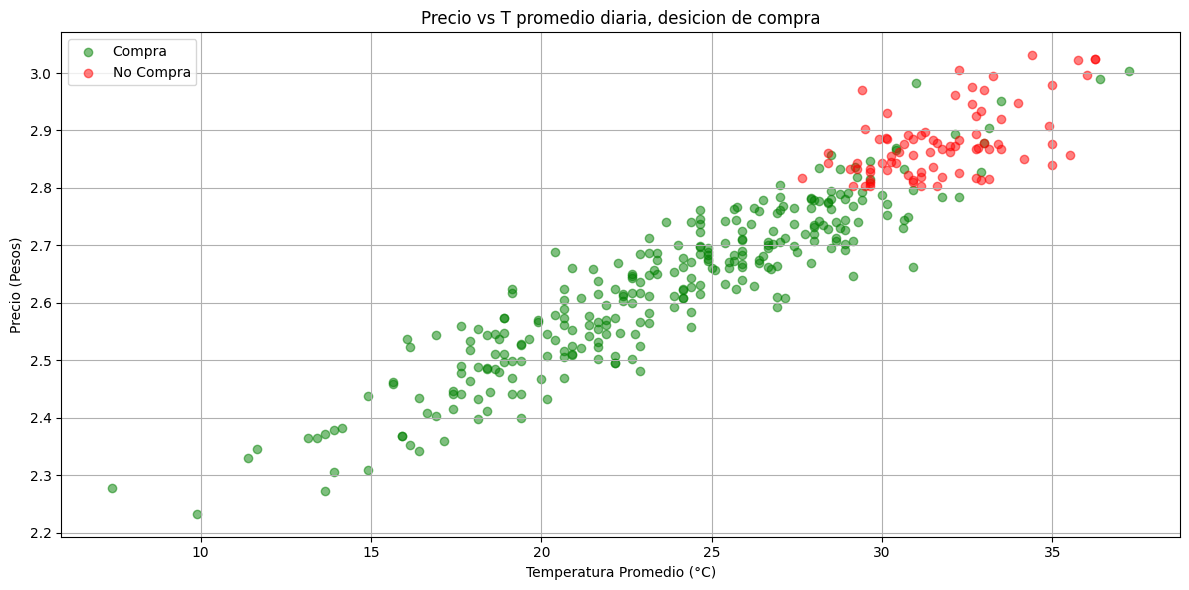

In [ ]:
dfSI = d_ciudad[d_ciudad['COMPRA_HELADO'] == 'SI']
dfNO = d_ciudad[d_ciudad['COMPRA_HELADO'] == 'NO']

plt.figure(figsize=(12, 6))
plt.scatter(dfSI['Tprom'], dfSI['PRECIO_DEL_HELADO'], c='g', label='Compra', alpha=0.5)
plt.scatter(dfNO['Tprom'], dfNO['PRECIO_DEL_HELADO'], c='r', label='No Compra', alpha=0.5)

plt.title('Precio vs T promedio diaria, desicion de compra')
plt.xlabel('Temperatura Promedio (°C)')
plt.ylabel('Precio (Pesos)')
plt.grid(True)

plt.legend()
plt.tight_layout()

plt.show()

**3.** **GENERAR TRES  PERCEPTRONES (SEGUIR LOS EJEMPLOS MOSTRADOS DE PERCEPTRON EN CLASE)CONECTADOS ENTRE SI DE MANERA QUE TENGA COMO CONDICIÓN LO SIGUIENTE:**

  * **SI HACEN MÁS DE 27 GRADOS DE TEMPERATURA O INCLUSIVE SI EL PRECIO DEL HELADO ESTA POR DEBAJO DEL 40 % DE INCREMENTO, LA RED NEURONAL DEBERA INDICAR QUE SE COMPRA EL HELADO. ( los pesos colocarlos de manera aleatoria, usar la función de salto finito o función sigmoide para la activación)**

In [ ]:
# Establecer el precio inicial
precio_inicial = 2

# Calcular el aumento de precios en porcentaje en comparación con el precio inicial
d_ciudad['Aumento_Precio_Porcentaje'] = ((d_ciudad['PRECIO_DEL_HELADO'] - precio_inicial) / precio_inicial) * 100

# Verificar el resultado
d_ciudad.head()

<ipython-input-22-3b7011f06f7d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_ciudad['Aumento_Precio_Porcentaje'] = ((d_ciudad['PRECIO_DEL_HELADO'] - precio_inicial) / precio_inicial) * 100


,NOMBRE,FECHA_T,TMAX_F,TMIN_F,Tprom,PRECIO_INICIAL,PRECIO_DEL_HELADO,COMPRA_HELADO,Aumento_Precio_Porcentaje
87,RIVADAVIA,2023-10-30,37.0,21.799999,29.400000,2,2.792962,SI,39.648110
206,RIVADAVIA,2023-10-29,43.0,22.299999,32.650002,2,2.946210,NO,47.310480
325,RIVADAVIA,2023-10-28,36.0,22.299999,29.150000,2,2.708506,SI,35.425297
444,RIVADAVIA,2023-10-27,32.0,17.799999,24.900000,2,2.677084,SI,33.854202
563,RIVADAVIA,2023-10-26,25.5,18.299999,21.900000,2,2.569491,SI,28.474541


In [ ]:
umbral_temp = 27.00 # temperatura a partir de la cual se compra
umbral_precio = 0.4 # aumnto de precio a partir del cual no se compra en el 80 por de los casos
peso_temperatura = 1.4 # peso o importancia de la variable temp
peso_precio = 4 #peso o importancia de la variable precio. No lo uso.
peso_compra = 0.2 # porcentaje de compras cuando el precio supero el 40

# Funcion de activacion
#def sigmoid(x):
    #return 1 / (1 + np.exp(-x))

# pesos y unmral de temp
#pesos_perceptron_temp = np.array([1.0, -27])  #ajustados a mano
#umbral_temp = 27  # Temperatura umbral para comprar helado

# pesos y umbral para el precio
#pesos_perceptron_precio = np.array([1.0, -0.4])


# Función para el perceptrón de temperatura
def perceptron_temp(temperatura, umbral_temperatura, peso_temp):
    if peso_temperatura * temperatura > umbral_temp: # la funcion de activacion en este caso es la funcion escalon
        return 1  # Compra
    else:
        return 0  # No compra

def perceptron_precio(precio, umbral_precio, peso_compra):
    # Perceptrón para precio del helado
    if precio < (1 + umbral_precio) * precio_inicial:
        return 1  # Compra
    elif precio >= (1 + umbral_precio) * precio_inicial and np.random.rand() <= peso_compra:
        return 1  # Compra con peso reducido
    else:
        return 0  # No compra

def decision_compra(temperatura, precio, umbral_temperatura, umbral_precio, peso_compra):
    # Combinar los resultados de los perceptrones usando "o" inclusiva
    resultado_temperatura = perceptron_temp(temperatura, umbral_temp,peso_temperatura)
    resultado_precio = perceptron_precio(precio, umbral_precio, peso_compra)

    if resultado_temperatura == 1 and resultado_precio == 1:
        return 1  # Compra
    else:
        return 0  # No compra

d_ciudad['DECISION_COMPRA'] = d_ciudad.apply(
    lambda row: decision_compra(row['Tprom'], row['PRECIO_DEL_HELADO'], umbral_temp, umbral_precio, peso_compra),
    axis=1
)

# Guardar la base de datos actualizada
d_ciudad.to_csv('ciudad_seleccionada.csv', index=False)

# Mostrar el DataFrame con la decisión de compra
d_ciudad.head(20)

<ipython-input-23-d1f7d09548df>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_ciudad['DECISION_COMPRA'] = d_ciudad.apply(


,NOMBRE,FECHA_T,TMAX_F,TMIN_F,Tprom,PRECIO_INICIAL,PRECIO_DEL_HELADO,COMPRA_HELADO,Aumento_Precio_Porcentaje,DECISION_COMPRA
87,RIVADAVIA,2023-10-30,37.0,21.799999,29.400000,2,2.792962,SI,39.648110,1
206,RIVADAVIA,2023-10-29,43.0,22.299999,32.650002,2,2.946210,NO,47.310480,1
325,RIVADAVIA,2023-10-28,36.0,22.299999,29.150000,2,2.708506,SI,35.425297,1
444,RIVADAVIA,2023-10-27,32.0,17.799999,24.900000,2,2.677084,SI,33.854202,1
563,RIVADAVIA,2023-10-26,25.5,18.299999,21.900000,2,2.569491,SI,28.474541,1
682,RIVADAVIA,2023-10-25,24.0,18.799999,21.400000,2,2.542931,SI,27.146532,1
801,RIVADAVIA,2023-10-24,31.5,22.799999,27.150000,2,2.608814,SI,30.440704,1
920,RIVADAVIA,2023-10-23,39.0,27.299999,33.150002,2,2.815235,NO,40.761773,0
1039,RIVADAVIA,2023-10-22,45.0,27.799999,36.400002,2,2.988982,SI,49.449085,0
1158,RIVADAVIA,2023-10-21,42.0,23.299999,32.650002,2,2.974896,NO,48.744791,0


In [ ]:
# Mapear los resultados a 'Si' o 'No'
d_ciudad['COMPRA_HELADO'] = d_ciudad['COMPRA_HELADO'].map({ 'SI': 1, 'NO': 0})


d_ciudad.head(10)

<ipython-input-24-23b56f67ed49>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_ciudad['COMPRA_HELADO'] = d_ciudad['COMPRA_HELADO'].map({ 'SI': 1, 'NO': 0})


,NOMBRE,FECHA_T,TMAX_F,TMIN_F,Tprom,PRECIO_INICIAL,PRECIO_DEL_HELADO,COMPRA_HELADO,Aumento_Precio_Porcentaje,DECISION_COMPRA
87,RIVADAVIA,2023-10-30,37.0,21.799999,29.400000,2,2.792962,1,39.648110,1
206,RIVADAVIA,2023-10-29,43.0,22.299999,32.650002,2,2.946210,0,47.310480,1
325,RIVADAVIA,2023-10-28,36.0,22.299999,29.150000,2,2.708506,1,35.425297,1
444,RIVADAVIA,2023-10-27,32.0,17.799999,24.900000,2,2.677084,1,33.854202,1
563,RIVADAVIA,2023-10-26,25.5,18.299999,21.900000,2,2.569491,1,28.474541,1
682,RIVADAVIA,2023-10-25,24.0,18.799999,21.400000,2,2.542931,1,27.146532,1
801,RIVADAVIA,2023-10-24,31.5,22.799999,27.150000,2,2.608814,1,30.440704,1
920,RIVADAVIA,2023-10-23,39.0,27.299999,33.150002,2,2.815235,0,40.761773,0
1039,RIVADAVIA,2023-10-22,45.0,27.799999,36.400002,2,2.988982,1,49.449085,0
1158,RIVADAVIA,2023-10-21,42.0,23.299999,32.650002,2,2.974896,0,48.744791,0


**4. Luego de diseñar los perceptrones, implementarlos sobre la base de datos generada de manera que se les pase por argumento las variables: TEMPERATURA PROMEDIO, PRECIO DEL HELADO. Comparar la proporción de respuestas correctas en las que coincide el resultado de la red neuronal , con la variable COMPRA HELADOS . Esto último es una forma de medir la exactitud de la red.**

In [ ]:
precision = (d_ciudad['COMPRA_HELADO'] == d_ciudad['DECISION_COMPRA']).mean()
print("Precisión:", precision)

Precisión: 0.7205479452054795


La precision de 75% se logara considerando un peso sobre la temperatura dado que se obtienen mayores resultados de compras. Por el planteo del problema, en donde el modelo indica comprar solo cuando la temperatura promedio es mayor a 27 grados y la inflacion menos al 40%, se pierden mucho resltados de compra que se obtuvieron en la columna "COMPRA_HELADO". Otra solucion a esto seria acomodar el modelo para que prediga una compra de helado si alguna de las dos condiciones es positiva. De esta forma se obtendria una compra para practicamente todo el rango de temperaturas y precios.

Ahora planteamos un modelo simplificado de una red neuronal. Las entradas seran el precio del helado y la temperatura promedio. Para los datos reales se toma la columna generada anteriormente "DECISION_COMPRA". Se utilizo una capa de dropout al 20% para prevenir el sobreentrenamiento y un numero un pco exagerado de neuronas para el problema. Tanto la precision en los datos de validacion como en la salida del modelo es similar y ronda el 92%.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers




X = d_ciudad[['Tprom', 'PRECIO_DEL_HELADO']]
y = d_ciudad['DECISION_COMPRA']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# divido el conjunto de entrenamiento en un conjunto de entrenamiento y un conjunto de validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Crear el modelo de Keras Secuencial
model = keras.Sequential([
    layers.Input(shape=(2,)),  # Capa de entrada con 2 características
    layers.Dense(128, activation='relu'),# capa oculta
     layers.Dense(128, activation='relu'), # capa oculta
    layers.Dropout(0.25), # capa para prevenir overfitting
    layers.Dense(1, activation='sigmoid')  # Capa de salida con 1 neurona y función de activación Sigmoide
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {accuracy * 100:.2f}%')


Epoch 1/100
8/8 [==============================] - 2s 77ms/step - loss: 0.6984 - accuracy: 0.5708 - val_loss: 0.6794 - val_accuracy: 0.6780
Epoch 2/100
8/8 [==============================] - 0s 18ms/step - loss: 0.6654 - accuracy: 0.6695 - val_loss: 0.6572 - val_accuracy: 0.6441
Epoch 3/100
8/8 [==============================] - 0s 20ms/step - loss: 0.6464 - accuracy: 0.6910 - val_loss: 0.6329 - val_accuracy: 0.6780
Epoch 4/100
8/8 [==============================] - 0s 13ms/step - loss: 0.6165 - accuracy: 0.7382 - val_loss: 0.5936 - val_accuracy: 0.7797
Epoch 5/100
8/8 [==============================] - 0s 22ms/step - loss: 0.5867 - accuracy: 0.8026 - val_loss: 0.5525 - val_accuracy: 0.8136
Epoch 6/100
8/8 [==============================] - 0s 14ms/step - loss: 0.5543 - accuracy: 0.7983 - val_loss: 0.5053 - val_accuracy: 0.8305
Epoch 7/100
8/8 [==============================] - 0s 13ms/step - loss: 0.5125 - accuracy: 0.7897 - val_loss: 0.4668 - val_accuracy: 0.8475
Epoch 8/100
8/8 [===

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Las predicciones son probabilidades, así que puedes redondearlas para obtener clases binarias (0 o 1)
y_pred_binary = (y_pred > 0.5).astype(int)

# Imprimir las predicciones
#print(y_pred_binary)

3/3 [==============================] - 0s 4ms/step


In [ ]:
from sklearn.metrics import accuracy_score

# Calcula la precisión comparando las predicciones con las etiquetas reales
precision = accuracy_score(y_test, y_pred_binary)

# Imprime la precisión
print(f'Precisión del modelo en el conjunto de prueba: {precision:.2f}')

Precisión del modelo en el conjunto de prueba: 0.93
